In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [15]:
dataset= pd.read_csv('Facebook_Marketplace_data.csv')

In [16]:
x= dataset.iloc[:,3:].values
y= dataset.iloc[:,1].values
print(x)
print(y)

[[529. 512. 262. ...  nan  nan  nan]
 [150.   0.   0. ...  nan  nan  nan]
 [227. 236.  57. ...  nan  nan  nan]
 ...
 [  2.   0.   0. ...  nan  nan  nan]
 [351.  12.  22. ...  nan  nan  nan]
 [ 17.   0.   0. ...  nan  nan  nan]]
['video' 'photo' 'video' ... 'photo' 'photo' 'photo']


In [17]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
x=imputer.fit_transform(x)
print(x)

[[529. 512. 262. ...   1.   1.   0.]
 [150.   0.   0. ...   0.   0.   0.]
 [227. 236.  57. ...   1.   0.   0.]
 ...
 [  2.   0.   0. ...   0.   0.   0.]
 [351.  12.  22. ...   0.   0.   0.]
 [ 17.   0.   0. ...   0.   0.   0.]]


In [21]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y= le.fit_transform(y)
print(y)

[3 1 3 ... 1 1 1]


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

In [29]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x= sc.fit_transform(x)

In [31]:
wcss =[]
for i in range(1,11):
  kmeans= KMeans(n_clusters= i, init= 'k-means++', random_state= 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

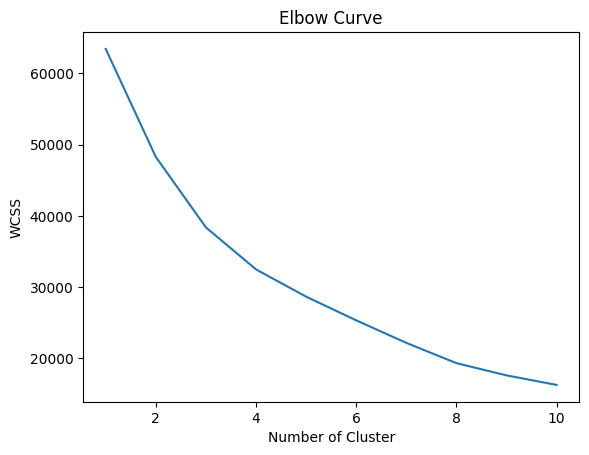

In [32]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [34]:
kmeans= KMeans(n_clusters= 3, init='k-means++', random_state= 42)
y_kmeans= kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


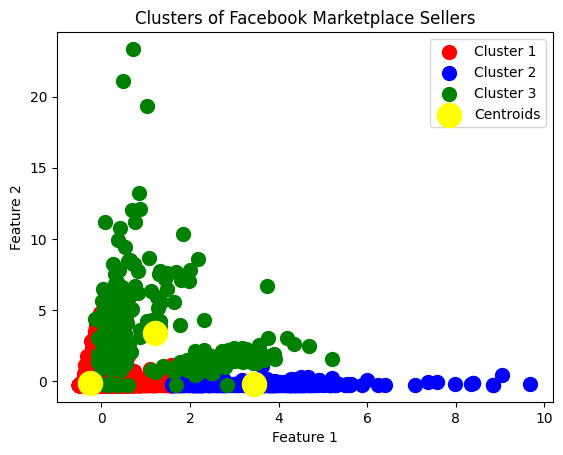

In [37]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s= 100, c= 'red', label='Cluster 1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s= 100, c= 'blue', label='Cluster 2')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s= 100, c= 'green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Facebook Marketplace Sellers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()